In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 26kB/s 
     |████████████████████████████████| 512kB 34.8MB/s 
     |████████████████████████████████| 3.8MB 38.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=91a997061cb1668256967d99a46a53d1590dc52c085f7be6c9658f6718cf0936
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [ ]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 108kB/s 
ERROR: umap-learn 0.4.2 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
! pip install shap

     |████████████████████████████████| 276kB 6.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394121 sha256=a75403ac5aa17f790d7b0fe96d65c7c88c3d5599b9b67916e2c0b613c3243f81
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
!pip install git+https://github.com/marcoancona/DeepExplain.git

  Cloning https://github.com/marcoancona/DeepExplain.git to /tmp/pip-req-build-z81tfaci
  Running command git clone -q https://github.com/marcoancona/DeepExplain.git /tmp/pip-req-build-z81tfaci
  Created wheel for deepexplain: filename=deepexplain-0.3-cp36-none-any.whl size=15253 sha256=191564cdcaf3914b1cc24ce78f913f2c8aaa5d8ff7e0031469a5396f14f9bba9
  Stored in directory: /tmp/pip-ephem-wheel-cache-df6f8jxf/wheels/f1/c2/ef/9e5a9bfb44280495fbe13e7ab8b1ccd0326796d94240f6a028
Successfully built deepexplain


In [ ]:
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  1.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D, Flatten, Dense,Dropout

Using TensorFlow backend.


In [ ]:
from sklearn.datasets import load_files
import numpy as np

train_dir = "/content/drive/My Drive/veg_dataset/veg_dataset/train"
test_dir = "/content/drive/My Drive/veg_dataset/veg_dataset/test"
valid_dir = "/content/drive/My Drive/veg_dataset/veg_dataset/validation"

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_valid, y_valid,target_labels = load_dataset(valid_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])
print('validation set size : ' , x_valid.shape[0])


Loading complete!
Training set size :  1184
Testing set size :  146
validation set size :  148


In [ ]:
target_labels[0]

'bitter gourd'

In [ ]:
no_of_classes = len(np.unique(y_train))
no_of_classes

6

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_valid = np_utils.to_categorical(y_valid,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Training set shape :  (1184,)
Validation set shape :  (148,)
Test set shape :  (146,)
1st training image shape  (450, 800, 3)


In [ ]:
import cv2
height = 224
width = 224
dim = (width, height)
x_tr=[]
x_va=[]
x_te=[]
for i in range(len(x_test)):
  res = cv2.resize(x_test[i], dim, interpolation=cv2.INTER_LINEAR)
  x_te.append(res)

for i in range(len(x_train)):
  res1 = cv2.resize(x_train[i], dim, interpolation=cv2.INTER_LINEAR)
  x_tr.append(res1)

for i in range(len(x_valid)):
  res2 = cv2.resize(x_valid[i], dim, interpolation=cv2.INTER_LINEAR)
  x_va.append(res2)


In [ ]:
x_train = np.array(x_tr)
x_test = np.array(x_te)
x_valid = np.array(x_va)

In [ ]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


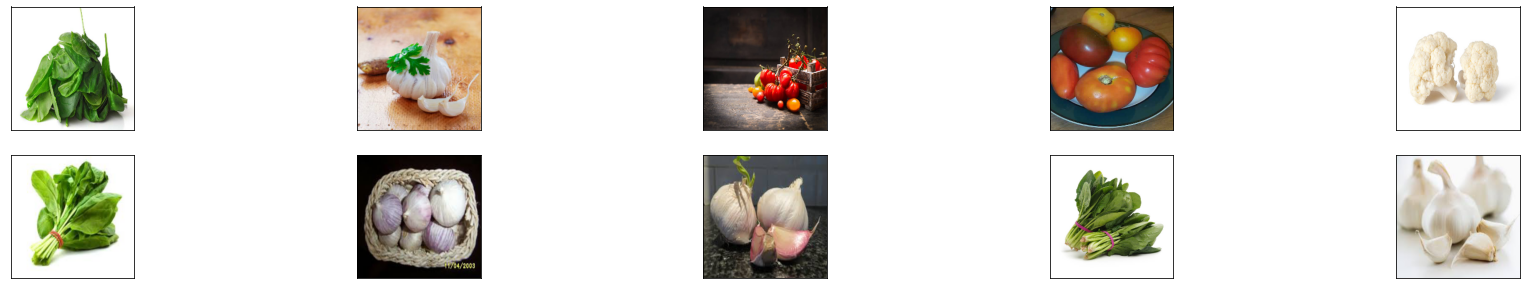

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
from keras import applications

In [ ]:
img_width, img_height = 224, 224

In [ ]:
model1 = applications.MobileNet(weights="imagenet",
                           include_top=False,
                           input_shape=(img_width,img_height,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
for layer in model1.layers[:5]:  
  layer.trainable = False

# model.summary()


In [ ]:
from keras.models import Model
x = model1.output
x = Flatten()(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(6,
                    activation="softmax")(x)

In [ ]:
model = Model(input=model1.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [ ]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",
                    optimizer=optimizers.SGD(lr=0.0001,momentum=0.9),
                    metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid,y_valid),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)


Train on 1184 samples, validate on 148 samples
Epoch 1/10
 - 14s - loss: 1.5838 - accuracy: 0.4958 - val_loss: 0.3076 - val_accuracy: 0.9122

Epoch 00001: val_loss improved from inf to 0.30758, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
 - 6s - loss: 0.3146 - accuracy: 0.8927 - val_loss: 0.1578 - val_accuracy: 0.9662

Epoch 00002: val_loss improved from 0.30758 to 0.15778, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/10
 - 6s - loss: 0.1722 - accuracy: 0.9502 - val_loss: 0.1057 - val_accuracy: 0.9730

Epoch 00003: val_loss improved from 0.15778 to 0.10575, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/10
 - 6s - loss: 0.1144 - accuracy: 0.9713 - val_loss: 0.0758 - val_accuracy: 0.9932

Epoch 00004: val_loss improved from 0.10575 to 0.07580, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/10
 - 6s - loss: 0.0962 - accuracy: 0.9662 - val_loss: 0.0593 - val_accuracy: 0.9932

Epoch 00005: val_loss improved from 0.07580 to 0.05931, saving model to cnn_from_

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [ ]:
# shapley values

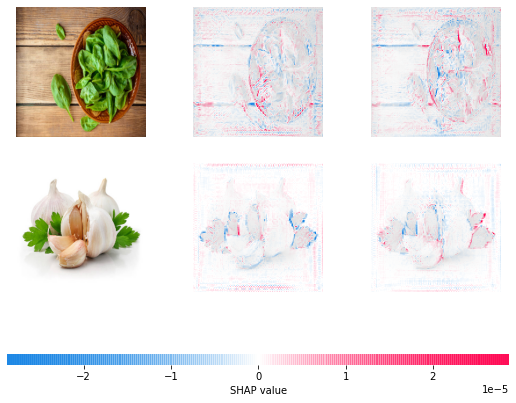

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

model = MobileNet(weights='imagenet', include_top=True)
X = x_train
to_explain = X[[55,57]]

def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

shap.image_plot(shap_values, to_explain)

In [ ]:
import os
import pathlib
import requests

import numpy as np
import matplotlib.image as mpimg

from PIL import Image
from io import BytesIO
from skimage import feature, transform
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline

# import keras dependencies
from keras.models import Model
from keras.applications import MobileNet as CNN
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.utils import to_categorical
import keras.backend as K

In [ ]:
def plot_single_image(image_path, fig_size=(10, 10), dpi=100):
    figure(figsize=fig_size, dpi=dpi)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()
    

# Plotting function for saliency maps
def plot_custom(data, xi=None, cmap='RdBu_r', axis=plt, percentile=100, dilation=3.0, alpha=0.8):
    dx, dy = 0.05, 0.05
    xx = np.arange(0.0, data.shape[1], dx)
    yy = np.arange(0.0, data.shape[0], dy)
    xmin, xmax, ymin, ymax = np.amin(xx), np.amax(xx), np.amin(yy), np.amax(yy)
    extent = xmin, xmax, ymin, ymax
    cmap_xi = plt.get_cmap('Greys_r')
    cmap_xi.set_bad(alpha=0)
    overlay = None
    if xi is not None:
        # Compute edges (to overlay to heatmaps later)
        xi_greyscale = xi if len(xi.shape) == 2 else np.mean(xi, axis=-1)
        in_image_upscaled = transform.rescale(xi_greyscale, dilation, mode='constant')
        edges = feature.canny(in_image_upscaled).astype(float)
        edges[edges < 0.5] = np.nan
        edges[:5, :] = np.nan
        edges[-5:, :] = np.nan
        edges[:, :5] = np.nan
        edges[:, -5:] = np.nan
        overlay = edges

    abs_max = np.percentile(np.abs(data), percentile)
    abs_min = -abs_max

    if len(data.shape) == 3:
        data = np.mean(data, 2)
    axis.imshow(data, extent=extent, interpolation='bicubic', cmap=cmap, vmin=abs_min, vmax=abs_max)
    if overlay is not None:
        axis.imshow(overlay, extent=extent, interpolation='bicubic', cmap=cmap_xi, alpha=alpha)
    axis.axis('off')
    return axis


def plot_comparison(target_image_path, map_array, title=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 20))

    img_orig = Image.open(target_image_path).resize((224, 224))
    xi = (map_array[0,:] - np.min(map_array[0,:]))
    xi /= np.max(xi)

    ax = axes.flatten()[0]
    ax.imshow(img_orig)
    ax.set_title('Original', fontdict={'fontsize': 20})
    ax.axis('off')

    plot_custom(attributions[0], xi = xi, axis=axes[1], dilation=.5, percentile=99, alpha=.2).set_title(title, fontdict={'fontsize': 20})
    plt.show()

    
def plot_gradcam(original_image_path, loaded_image, grads):
    fig, axs = plt.subplots(1, 2, figsize=(16, 10), constrained_layout=True)

    img_orig = Image.open(original_image_path).resize((224, 224))
    axs[0].imshow(img_orig, aspect='auto')
    axs[0].grid(False)

    axs[1].imshow(overlay(grads, loaded_image), aspect='auto')
    axs[1].grid(False)

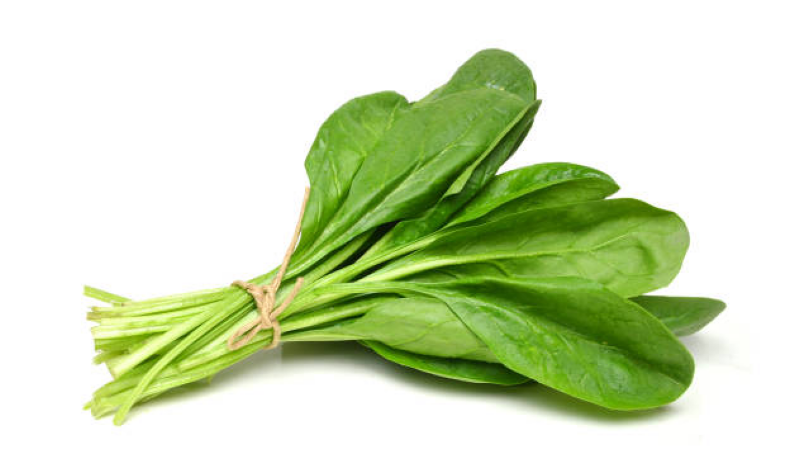

In [ ]:
target_image = '/content/drive/My Drive/veg_dataset/veg_dataset/test/spinach/bunch-of-spinach-leaves-on-isolated-white-background-picture-id1006196472.jpg'
plot_single_image(target_image)

In [ ]:
# Get the prediction
loaded_image = np.array(image.load_img(target_image, target_size=(224, 224)))
processed_image = preprocess_input(loaded_image)
preds = model.predict(processed_image[np.newaxis, :])
preds_name = decode_predictions(preds)


40960/35363 [==================================] - 0s 0us/step


In [ ]:
from deepexplain.tensorflow import DeepExplain

In [ ]:
with DeepExplain(session=K.get_session()) as de:
    model = CNN(include_top=True)
    input_tensor = model.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = model.layers[-1].output)
    target_tensor = fModel(input_tensor)
    top_idx = preds.argsort()[::-1]
    ys = to_categorical(top_idx, num_classes=1000)
    xs = np.tile(processed_image, (1, 1, 1, 1))
    attributions = de.explain('saliency', fModel.outputs[0] * ys, fModel.inputs[0], xs)

Detected unsupported activation (Relu6). This might lead to unexpected or wrong results.

DeepExplain detected you are trying to use an attribution method that requires gradient override but the original gradient was used instead. You might have forgot to (re)create your graph within the DeepExlain context. Results are not reliable!


In [ ]:
#saliency map

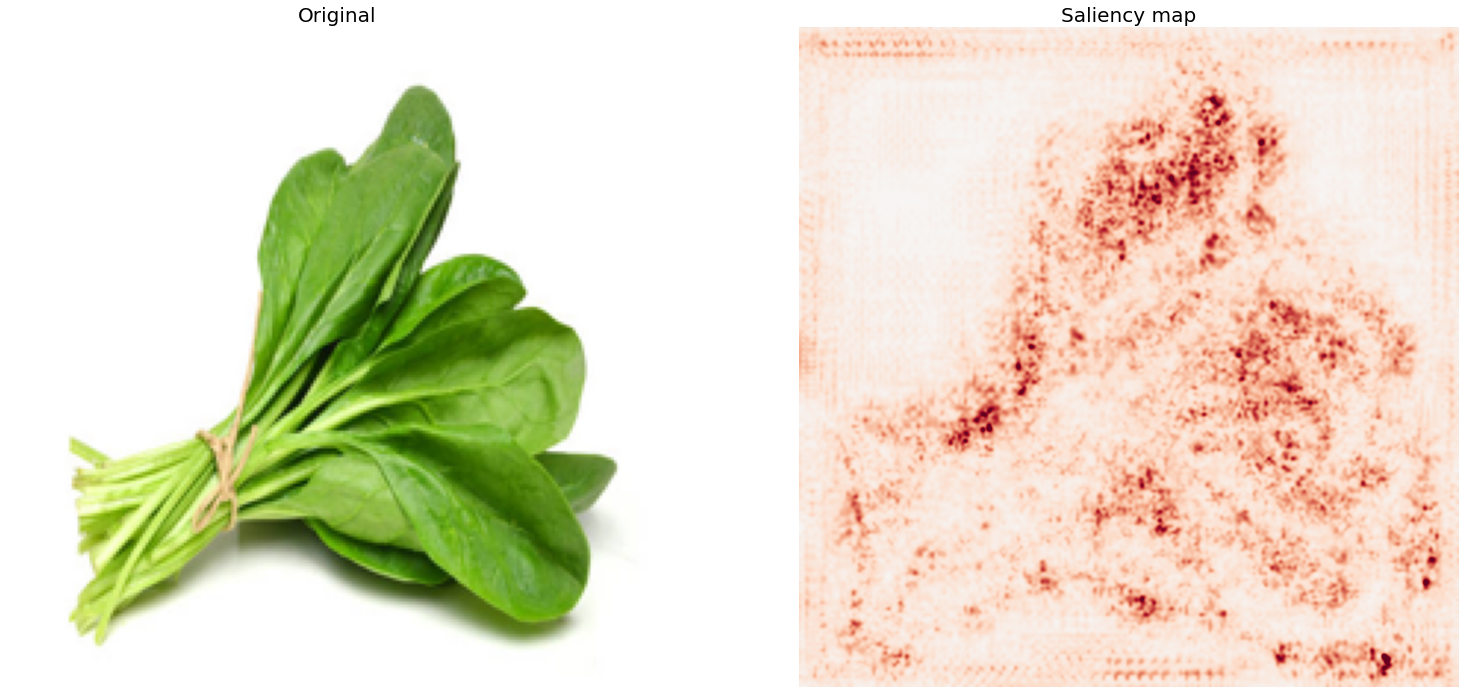

In [ ]:
plot_comparison(target_image, attributions, title='Saliency map')

In [ ]:
!pip install keras-vis

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
# import specific functions from keras-vis package
from vis.utils import utils
from vis.visualization import visualize_cam, overlay

In [ ]:

layer_idx = utils.find_layer_idx(model, 'conv_preds')

In [ ]:
grads = visualize_cam(model, layer_idx, filter_indices=np.argmax(preds), seed_input=processed_image, backprop_modifier=None)

In [ ]:
# grad cam

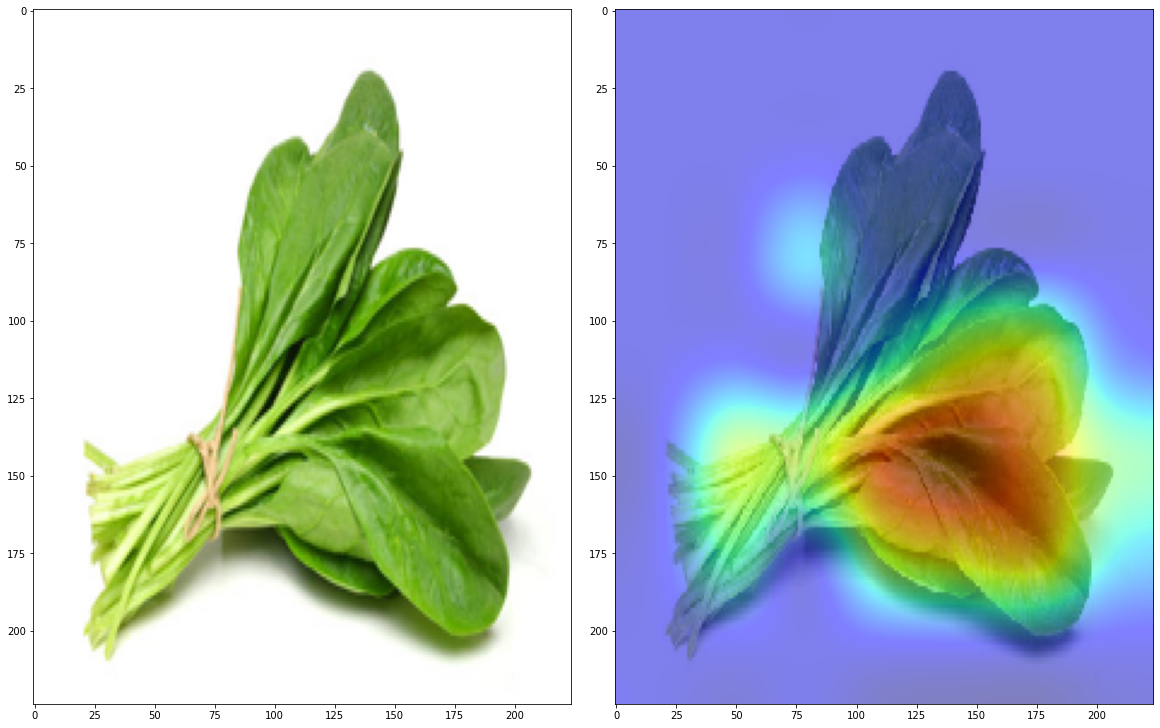

In [ ]:
plot_gradcam(target_image, loaded_image, grads)

In [ ]:
with DeepExplain(session=K.get_session()) as de:
    model = CNN(include_top=True)
    input_tensor = model.layers[0].input
    fModel = Model(inputs=input_tensor, outputs = model.layers[-1].output)
    target_tensor = fModel(input_tensor)
    top_idx = preds.argsort()[::-1]
    ys = to_categorical(top_idx, num_classes=1000)
    xs = np.tile(processed_image, (1, 1, 1, 1))
    attributions = de.explain('elrp', fModel.outputs[0] * ys, fModel.inputs[0], xs)

Detected unsupported activation (Relu6). This might lead to unexpected or wrong results.
DeepExplain detected you are trying to use an attribution method that requires gradient override but the original gradient was used instead. You might have forgot to (re)create your graph within the DeepExlain context. Results are not reliable!


In [ ]:
# layerwise relevance propagation

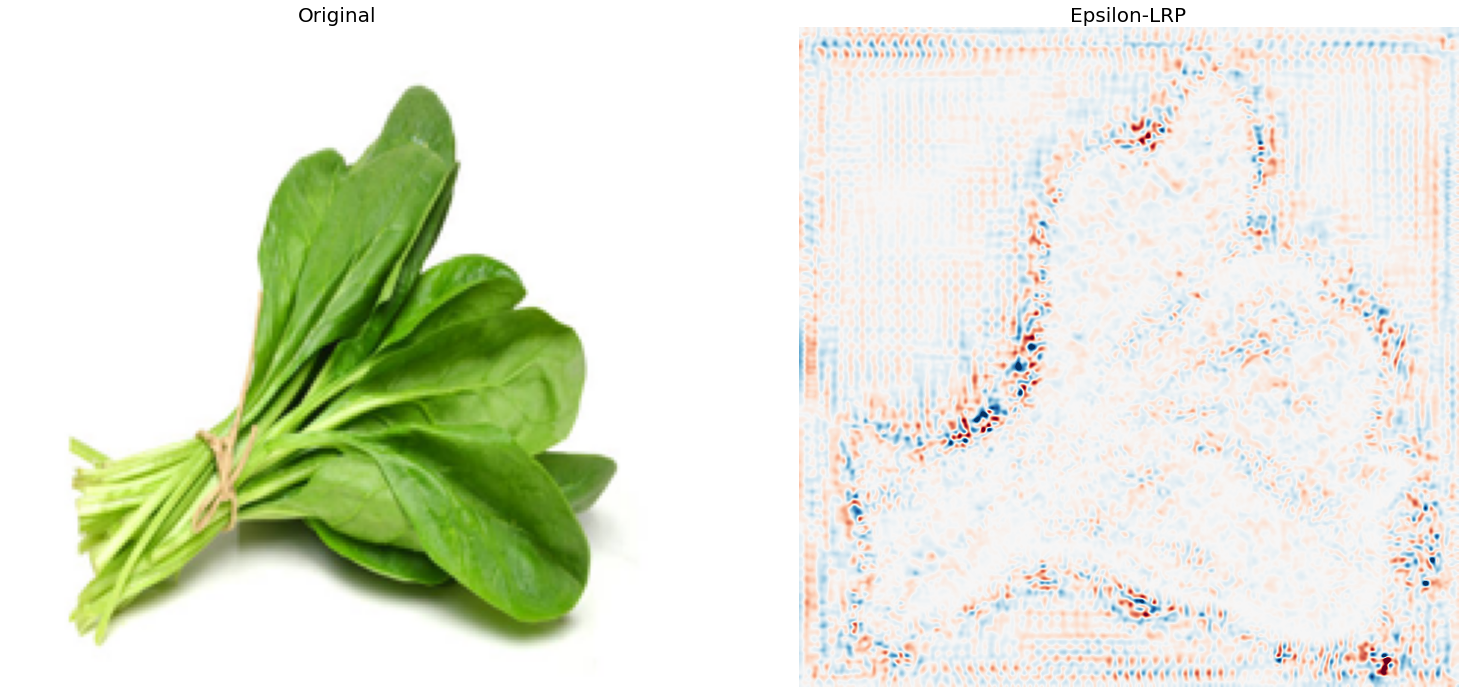

In [ ]:
plot_comparison(target_image, attributions, title='Epsilon-LRP')